In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap

In [2]:
def grain_rgb(array: np.ndarray, size: int) -> np.ndarray:
    """Dimension reduction by integration over (global) array axis, resizing, rescaling and stacking.
    From a 3rd order tensor (input) to 3 matrices. Each matrix is treated as  a single channel of an RGB image.
    Values are rescaled into range 0-255.

    Args:
        array (np.ndarray): 3rd order tensor of single grain. 0 --> matrix voxel, 1 --> garnet voxel.
        size (int): Size parameter "n" for the  n x n-matrices of the output RGB image.

    Returns:
        rgb (np.ndarray): n x n x 3-array, corresponding to an RGB image.
    """
    # sum over a axis to get a 2D matrix, then resize
    r = np.sum(array, axis=(0)).astype(np.float32)
    r = cv2.resize(r, dsize=(size, size), interpolation=cv2.INTER_LINEAR_EXACT)
    g = np.sum(array, axis=(1)).astype(np.float32)
    g = cv2.resize(g, dsize=(size, size), interpolation=cv2.INTER_LINEAR_EXACT)
    b = np.sum(array, axis=(2)).astype(np.float32)
    b = cv2.resize(b, dsize=(size, size), interpolation=cv2.INTER_LINEAR_EXACT)

    # stack the 3 2D matrices as 3 channel RGB
    rgb = np.dstack((r, g, b))
    # rescale values from 0-255
    rgb *= 255./rgb.max()

    return rgb

In [3]:
R_channel = LinearSegmentedColormap.from_list("R", ["black", "red"])
G_channel = LinearSegmentedColormap.from_list("G", ["black", "green"])
B_channel = LinearSegmentedColormap.from_list("B", ["black", "blue"])

In [4]:
# load the numpy array
file = Path("example_grains_arrays", "arr64.npy")
arr = np.load(file)

arr_img = grain_rgb(arr, 64)

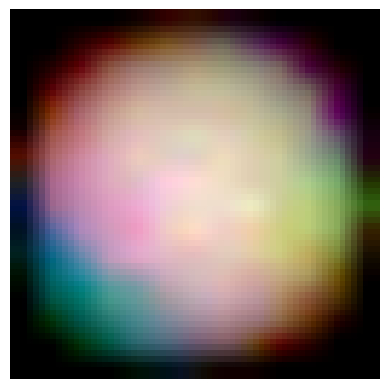

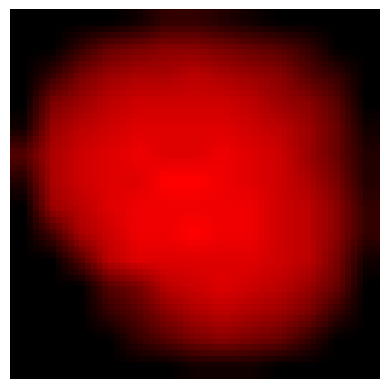

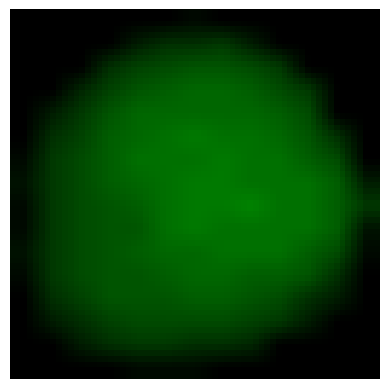

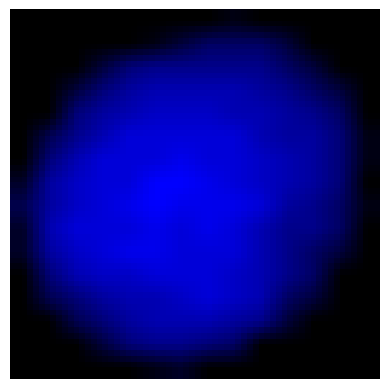

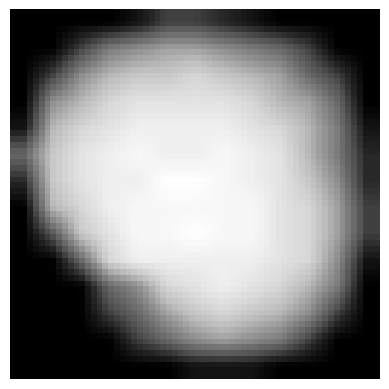

In [5]:
fig, ax = plt.subplots()
ax.imshow(arr_img / 255.)
ax.axis("off")
fig.savefig("intact.png")

fig, ax = plt.subplots()
ax.imshow(arr_img[:, :, 0], cmap=R_channel)
ax.axis("off")
fig.savefig("intact_R.png")

fig, ax = plt.subplots()
ax.imshow(arr_img[:, :, 1], cmap=G_channel)
ax.axis("off")
fig.savefig("intact_G.png")

fig, ax = plt.subplots()
ax.imshow(arr_img[:, :, 2], cmap=B_channel)
ax.axis("off")
fig.savefig("intact_B.png")

fig, ax = plt.subplots()
ax.imshow(arr_img[:, :, 0], cmap="Greys_r")
ax.axis("off")
fig.savefig("intact_proj_bw.png")

In [6]:
# load the numpy array
file = Path("example_grains_arrays", "arr181.npy")
arr = np.load(file)

arr_img = grain_rgb(arr, 64)

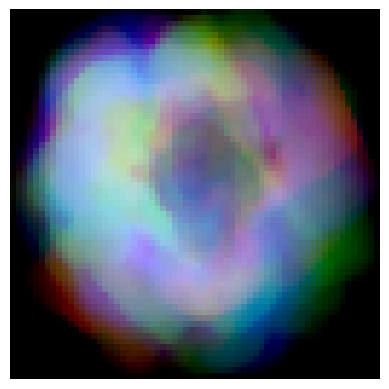

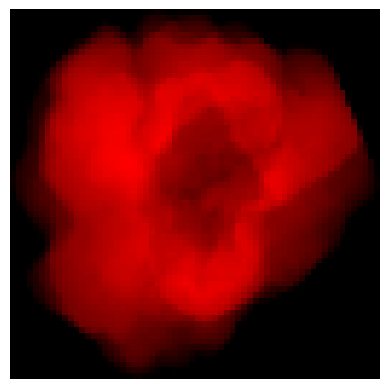

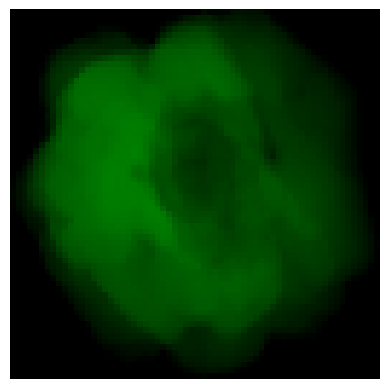

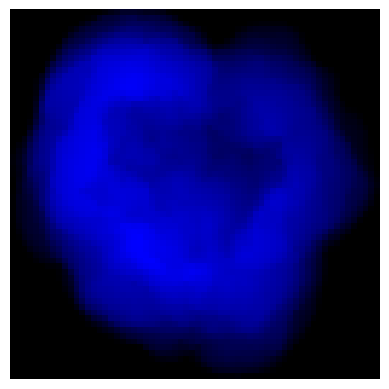

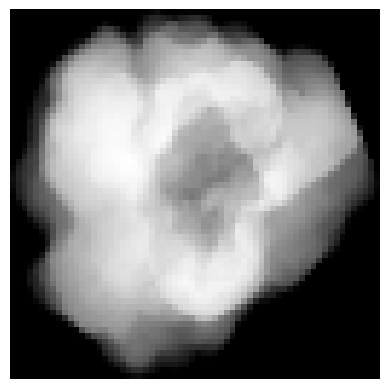

In [7]:
fig, ax = plt.subplots()
ax.imshow(arr_img / 255.)
ax.axis("off")
fig.savefig("atoll.png")

fig, ax = plt.subplots()
ax.imshow(arr_img[:, :, 0], cmap=R_channel)
ax.axis("off")
fig.savefig("atoll_R.png")

fig, ax = plt.subplots()
ax.imshow(arr_img[:, :, 1], cmap=G_channel)
ax.axis("off")
fig.savefig("atoll_G.png")

fig, ax = plt.subplots()
ax.imshow(arr_img[:, :, 2], cmap=B_channel)
ax.axis("off")
fig.savefig("atoll_B.png")

fig, ax = plt.subplots()
ax.imshow(arr_img[:, :, 0], cmap="Greys_r")
ax.axis("off")
fig.savefig("atoll_proj_bw.png")